In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.decomposition import PCA

from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB



In [ ]:
train = pd.read_csv('fashion-mnist_train.csv')

In [ ]:
train.head()

In [ ]:
test = pd.read_csv('fashion-mnist_test.csv')

In [ ]:
test.head()

#### the labels:

0 =	T-shirt/top

1 =	Trouser

2 =	Pullover

3 =	Dress

4 =	Coat

5 =	Sandal

6 =	Shirt

7 =	Sneaker

8 =	Bag

9 =	Ankle boot



In [9]:

class_table = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]

#  From number to Item of fashion:

def get_label_cls(label):
    return class_table[label]

get_label_cls(3)

'Dress'

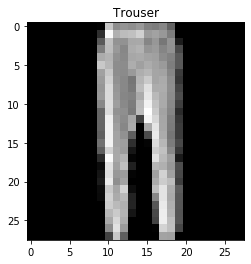

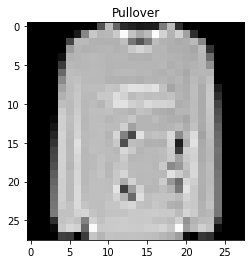

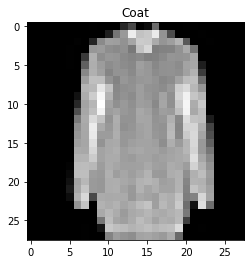

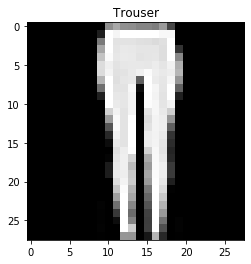

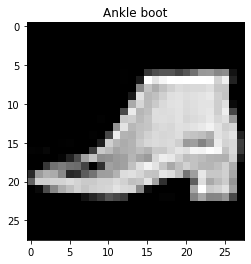

In [10]:
# Example of the pictures

for i in range(5000,5005): 
    sample = np.reshape(test[test.columns[1:]].iloc[i].values, (28,28))
    plt.figure()
    plt.title(get_label_cls(test["label"].iloc[i]))
    plt.imshow(sample, 'gray')

### Split into X and y both training set and testing set


In [11]:
X_train = train.drop('label',axis=1)
y_train = train['label']
X_test = test.drop('label',axis=1)
y_test = test['label']

In [12]:
X_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## PCA


lets try diffrent options in PCA,  and find the optimle option by comparison Random-Forest's score in each option:

#### 300 pixels:

In [13]:
pca1 = PCA(n_components=300)
pca1.fit(X_train)
pca_x_train = pca1.transform(X_train)
pca_x_test = pca1.transform(X_test)

# From array to Data Frame  &  Normalizing the features:
pca_x_train_df1 = pd.DataFrame(data = pca_x_train)/255
pca_x_test_df1 = pd.DataFrame(data = pca_x_test)/255

In [ ]:
rf = RandomForestClassifier(n_estimators=100)
score_rf1 = cross_val_score(rf, pca_x_train_df1, y_train, cv=5)
print (score_rf1.mean())

#### 196 pixels:

In [ ]:
pca2 = PCA(n_components=196)
pca2.fit(X_train)
pca_x_train = pca2.transform(X_train)
pca_x_test = pca2.transform(X_test)

# From array to Data Frame  &  Normalizing the features:
pca_x_train_df2 = pd.DataFrame(data = pca_x_train)/255
pca_x_test_df2 = pd.DataFrame(data = pca_x_test)/255

In [ ]:
rf = RandomForestClassifier(n_estimators=100)
score_rf2 = cross_val_score(rf, pca_x_train_df2, y_train, cv=5)
print (score_rf2.mean())

#### 100 pixels:

In [ ]:
pca3 = PCA(n_components=100)
pca3.fit(X_train)
pca_x_train = pca3.transform(X_train)
pca_x_test = pca3.transform(X_test)

# From array to Data Frame  &  Normalizing the features:
pca_x_train_df3 = pd.DataFrame(data = pca_x_train)/255
pca_x_test_df3 = pd.DataFrame(data = pca_x_test)/255

In [ ]:
rf = RandomForestClassifier(n_estimators=100)
score_rf3 = cross_val_score(rf, pca_x_train_df3, y_train, cv=5)
print (score_rf3.mean())

#### 50 pixels:

In [ ]:
pca4 = PCA(n_components=50)
pca4.fit(X_train)
pca_x_train = pca4.transform(X_train)
pca_x_test = pca4.transform(X_test)

# From array to Data Frame  &  Normalizing the features:
pca_x_train_df4 = pd.DataFrame(data = pca_x_train)/255
pca_x_test_df4 = pd.DataFrame(data = pca_x_test)/255

In [ ]:
rf = RandomForestClassifier(n_estimators=100)
score_rf4 = cross_val_score(rf, pca_x_train_df4, y_train, cv=5)
print (score_rf4.mean())

In [ ]:
score = [score_rf1.mean(), score_rf2.mean(), score_rf3.mean(), score_rf4.mean()]
score_by_pixel = pd.DataFrame ( data= score, index = ['300 pixels', '196 pixels', '100 pixels', '50 pixels'] )
score_by_pixel

#### --->  the optimal option is:   n_components= 100 (pca3)

In [ ]:
pca_x_train_df3.head()

In [ ]:
y_train_pd = pd.DataFrame(data = y_train)
y_train_pd.head()

#### the influence of PCA on picture's quality

In [ ]:
#before:
sample = np.reshape(X_train.iloc[2].values, (28,28))
plt.figure()
plt.title(get_label_cls(y_train_pd["label"].iloc[2]))
plt.imshow(sample, 'gray')

In [ ]:
#after:

xx = pca2.ivnerse_transform(pca_x_train_df2)
sample = np.reshape(xx.iloc[2].values, (14,14))
plt.figure()
plt.title(get_label_cls(y_train_pd["label"].iloc[2]))
plt.imshow(sample, 'gray')

## Models  &  Cross-Validation

#### Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=100)
score_rf = cross_val_score(rf, pca_x_train_df3, y_train, cv=5)
print ("Random Forest's score:  ", score_rf.mean())

#### AdaBoost

In [ ]:
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
score_abc = cross_val_score(abc, pca_x_train_df3, y_train, cv=5)
print ("AdaBoost's score:  ", score_abc.mean())

#### Decision Tree

In [ ]:
from sklearn import tree
score_dt_by_i = []

for i in range (5,20):
    dt = tree.DecisionTreeClassifier(random_state=7, max_depth=i)
    score_dt = cross_val_score(dt, pca_x_train_df3, y_train, cv=5)
    score_dt_by_i.append(score_dt.mean())

In [ ]:
plt.figure(figsize=(10,5))    
plt.plot(range(5,20), score_dt_by_i, marker='o')

--->  the optimal depth is 14:

In [ ]:
dt = tree.DecisionTreeClassifier(random_state=7, max_depth=14)
score_dt = cross_val_score(dt, pca_x_train_df3, y_train, cv=5)
print ("Decision Tree's score: ", score_dt.mean())

#### Knn

In [ ]:
#find the optimal K:

score_knn_by_i = []

for i in range (2,6):
    knn = KNeighborsClassifier(n_neighbors=i)
    score_knn = cross_val_score(knn, pca_x_train_df3, y_train, cv=5)
    score_knn_by_i.append(score_dt.mean())


In [ ]:
plt.figure(figsize=(10,5))    
plt.plot(range(2,6), score_knn_by_i, marker='o')

--->  the score is the same so we take randomly k=2

In [ ]:
knn = KNeighborsClassifier(n_neighbors=2)
score_knn = cross_val_score(knn, pca_x_train_df3, y_train, cv=5)
print ("knn's score: ", score_knn.mean())

#### Naive Bayes

In [ ]:
nb = GaussianNB()
score_nb = cross_val_score(nb, pca_x_train_df3, y_train, cv=5)
print (score_nb.mean())

In [ ]:
all_score = pd.DataFrame ( data= [score_rf.mean(), score_abc.mean(), score_dt.mean(), score_knn.mean(), score_nb.mean()],
                          index = ['Random Forest', 'AdaBoost', 'Decision Tree', 'knn', 'Naive Bayes' ] )

In [ ]:
all_score

#### ---> the best model is Random Forest

### training the model

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report,confusion_matrix

rf.fit(pca_x_train_df3, y_train )
y_pred = rf.predict(pca_x_test_df3)


In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
index = ['Actually T-shirt', 'Actually Trouser', 'Actually Pullover', 'Actually Dress', 'Actually Coat',
         'Actually Sandal', 'Actually Shirt', 'Actually Sneaker', 'Actually Bag', 'Actually Ankle boot']
columns= ['Predicted as T-shirt', 'Predicted as Trouser', 'Predicted as Pullover', 'Predicted as Dress',
         'Predicted as Coat','Predicted as Sandal', 'Predicted as Shirt', 'Predicted as Sneaker', 
          'Predicted as Bag', 'Predicted as Ankle boot']
conf_mat_pd = pd.DataFrame(data =conf_mat, index=index, columns=columns)
conf_mat_pd

In [ ]:
print( classification_report(y_test,y_pred))